# Case Study 4.1 - Movies

# Identification Information

In [2]:
# YOUR NAME              = Qi Guo
# YOUR MITX PRO USERNAME = guoqi228
# YOUR MITX PRO E-MAIL   = guoqi228@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [3]:
!pip install surprise

    100% |████████████████████████████████| 3.3MB 284kB/s ta 0:00:011
    100% |████████████████████████████████| 31.2MB 52kB/s eta 0:00:011  8% |██▉                             | 2.8MB 4.2MB/s eta 0:00:07    34% |███████████                     | 10.7MB 8.7MB/s eta 0:00:03    35% |███████████▎                    | 11.0MB 5.8MB/s eta 0:00:04    35% |███████████▌                    | 11.2MB 4.8MB/s eta 0:00:05    55% |█████████████████▊              | 17.3MB 2.3MB/s eta 0:00:07    62% |████████████████████▏           | 19.6MB 3.5MB/s eta 0:00:04    68% |██████████████████████          | 21.4MB 5.5MB/s eta 0:00:02    83% |██████████████████████████▊     | 26.0MB 5.0MB/s eta 0:00:02    96% |███████████████████████████████ | 30.2MB 4.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for scikit-surprise ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise
  Found existing installation: sc

Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

Import the required tools into the notebook.

In [1]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

In [2]:
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Data

Load the MovieLens data. A dialog may pop up saying **"Dataset ml-100k could not be found. Do you want to download it? [Y/n]"** Type Y and hit Enter to start the download process.

In [3]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/nbuser/.surprise_data/ml-100k


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.

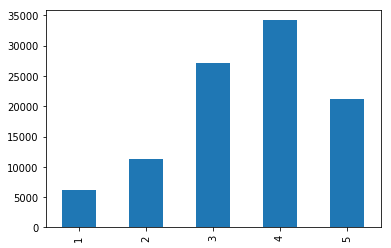

In [4]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar()

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

In [5]:
print('Number of rating: {}'.format(len(ratings)))

Number of rating: 100000


*Type your response here...*
#### There are 100,000 ratings in the dataset.
#### We can see from the histogram that most of the ratings is distributed around 3, 4 and 5. The number of rating 3 is about 26,000. The number of rating 4 is about 34,000. The number of rating 5 is about 21,000. The total number of rating 3, 4 and 5 is 81,000 which is about 81% of total number of ratings.
#### Also we can observe that the bias toward high ratings in the disturibution doesn't mean there are more 'good' moives than 'bad' moives. If we assume the rating are normally distuributed, most of the ratings should be around 2, 3 and 5. Actually, users are more likely to rate a moive they like but not to rate a moive they dislike. That's why when a moive has been rated and the rating is more often to be a high rating. 

# Model 1: Random

In [6]:
# Create model object
model_random = NormalPredictor()

In [7]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5193  1.5235  1.5260  1.5128  1.5169  1.5197  0.0047  
Fit time          1.22    1.50    1.38    1.47    1.40    1.39    0.10    
Test time         1.91    2.32    1.91    1.70    2.96    2.16    0.45    


# Model 2: User-Based Collaborative Filtering

In [8]:
# Create model object
model_user = KNNBasic(sim_options={'user_based': True})

In [9]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9838  0.9811  0.9757  0.9808  0.9716  0.9786  0.0044  
Fit time          5.48    6.37    6.59    6.05    6.17    6.13    0.37    
Test time         45.01   44.23   46.31   50.29   53.49   47.87   3.50    


# Model 3: Item-Based Collaborative Filtering

In [10]:
# Create model object
model_item = KNNBasic(sim_options={'user_based': False})

In [11]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9768  0.9699  0.9809  0.9662  0.9759  0.9739  0.0052  
Fit time          9.18    11.67   12.11   8.29    6.67    9.58    2.05    
Test time         63.90   64.89   59.74   46.78   40.70   55.20   9.71    


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

*Type your response here...*
#### We can see from the result above that the random model gives us a RMSE (Root Mean Squred Error) of 1.5197 (mean of RMSE 5 splits). The user-based collaborative filtering gives us RMSE of 0.9786 (mean of RMSE of 5 splits). The iterm-based collaborative filtering gives us RMSE of 0.9739  (mean of RMSE of 5 splits). 
#### The random model has the highest RMSE which means this model performs worest. The user-based collaborative filtring and iterm-based collaborative filtering have significantly improved the result (reducing the RMSE by 0.6). The user-based collaborative filtring and iterm-based collaborative filtering perform almost the same considering their mean of RMSE and standard deviation. These two collabrative filtering model performed better because the model consider user similarity and item similarity. 

# Model 4: Matrix Factorization

In [12]:
# Create model object
model_matrix = SVD()

In [13]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may take some time (2-3 minutes) to train, so please be patient
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9422  0.9313  0.9339  0.9400  0.9344  0.9364  0.0041  
Fit time          30.65   30.81   31.40   30.92   29.66   30.69   0.57    
Test time         0.94    1.65    1.56    1.06    1.44    1.33    0.28    


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

*Type your response here...*
#### The collaborative filtering models uses the similarity of user and item while the matrix factorization uses low rank matrix factorization. 
#### The mean of RMSE of matrix factorization is 0.9364. The result is significantly improved comparing to the random model and even better than the two collabrative filtering model. The reason is matrix factorization uses proximity to  the user in the latent space. 

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [14]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

*Type your response here...*
#### When k = 5, we have following results: <br> NormalPredictor: precision: 0.584, recall: 0.338 <br> KNNBasic: precision: 0.765, recall: 0.457 <br> KNNBasic: precision: 0.816, recall: 0.388 <br> SVD precision: 0.78,  recall  : 0.433
#### When k = 10, we have following results: <br> NormalPredictor : precision: 0.585 recall  : 0.428 <br> KNNBasic: precision: 0.74, recall  : 0.591 <br> KNNBasic: precision: 0.79, recall  : 0.534 <br> SVD precision: 0.763, recall  : 0.562

#### We can see above results that the random model has the lowest precision and recall in both cases of k=5 and k=10. When k = 5 all the results have low recall. For example, KNNBasic (item based) has the highest precision of 0.816 but the recall is only 0.388. When K = 10, we can see all of the recall has increased. However, the highest precision is all about 79% which become smaller. 

#### The resulty agrees with RMSE result showing that random model has the worest performance. While item based model, user based model and matrix factorization model have much better and similar performance.


In [15]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))

>>> k=5, model=NormalPredictor
>>> precision: 0.584
>>> reccall  : 0.338
>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.765
>>> reccall  : 0.457
>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.816
>>> reccall  : 0.388
>>> k=5, model=SVD
>>> precision: 0.78
>>> reccall  : 0.433
>>> k

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [16]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

In [17]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

*Type your response here...*
#### Random model top 5 prediction: '40', '1042', '277', '979', '332'.  <br> User based model top 5 pridiction: '1189', '1500', '814', '1536', '1599'. <br> Item based model top 5 prediction: '1414', '1309', '1310', '1675', '1676'. Matrix model top 5 prediction: '515', '357', '318', '114', '98'. 

#### In real-world, we could push all the recommended contents to user. Base on user's  feedback on the recommended contents, we can furthermore calibrate our models to make better prediction. 

In [18]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f1c95a47358>, 196: [('40', 5), ('1042', 5), ('277', 5), ('979', 5), ('332', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f1c8d6d6b38>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f1c8d6d6c18>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f1c8d73b6a0>, 196: [('515', 4.648483393588845), ('357', 4.6459641502344535), ('318', 4.621387641080771), ('114', 4.592982684972789), ('98', 4.552627600522945)]


<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.